Welcome to the museum art collection app
Please enter your email address: t@gmail.com
Please enter your age: 100
Choose an art collection category
1- Traditional
2- Modern
3- Contemporary
3
Welcome to the Contemporary art category! Choose the picture you wish to see:
1- Basquiat art
2- Expansion by Paige Bradley
2


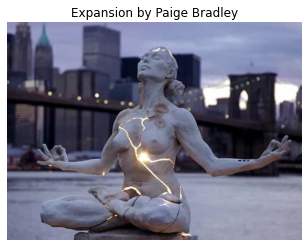

What kind of Edge detection do you wish to perform?:
1- Sobel
2- Perwitt
3- Robert
4- Canny
5- Laplacian
:1


error: OpenCV(4.11.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x6a3ea619::Set<3,4,-1>,struct cv::impl::A0x6a3ea619::Set<0,2,5>,4>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import re
import os  # Import the 'os' module here

def is_valid_email ( email ) :
    pattern = r"^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$"
    return re.match ( pattern , email ) #checks if the emial followsthe defined regex patetrn

def get_visitor_age ( ) :
    while True :
        try :
            age = int ( input ( "Please enter your age: " ) )
            if age >= 18 :
                return age
            else :
                print ( "Sorry! must be at least 18 years old to access the collection." )
        except ValueError :
            print ( "Invalid input. Please enter a number" )



def display_image_by_category():
    categories = {
        1: {
            "name": "Traditional",
            "artworks": [
                ("Benin traditional Art",'Images/benin_art_trad.jpeg'),
                ("Ife art", 'Images/ife_art_trad.jpeg'),
                ("Igbo Ukwu art", 'Images/igbo_ukwu_trad.jpeg')
            ]
        },
        2: {
            "name": "Modern",
            "artworks": [
                ("Soup Cans", 'Images/soup_can_modern.jpeg'),
                ("Starry Night", 'Images/starry_night_modern.jpeg')
            ]
        },
        3: {
            "name": "Contemporary",
            "artworks": [
                ("Basquiat art", 'Images/basquait_contemporary.jpeg'),
                ("Expansion by Paige Bradley", 'Images/expansion_paige_bradley.jpeg')
            ]
        }
    }

    # Select category
    while True:
        try:
            category = int(input("Choose an art collection category\n1- Traditional\n2- Modern\n3- Contemporary\n"))
            if category in categories:
                break
            else:
                print("Invalid category. Please choose from the options above.")
        except ValueError:
            print("Invalid input. Please enter a number between 1 and 3.")

    selected_category = categories[category]
    print(f"Welcome to the {selected_category['name']} art category! Choose the picture you wish to see:")

    for i, (title, _) in enumerate(selected_category["artworks"], 1):
        print(f"{i}- {title}")

    # Select artwork
    while True:
        try:
            choice = int(input())
            if 1 <= choice <= len(selected_category["artworks"]):
                title, image_path = selected_category["artworks"][choice - 1]
                break
            else:
                print("Invalid choice. Please select a number from the options above.")
        except ValueError:
            print("Invalid input. Please enter a number.")

    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convert BGR to RGB
    plt.figure(f"Selected Art: {title}") # Create a new figure
    plt.imshow(image_rgb)
    plt.title(title)
    plt.axis('off') # Turn off axis numbers and ticks
    plt.show(block=False) # Show the plot in a non-blocking way
    return image


def edge_detection ( image , detection_choice ) :
    #resize images
    image= cv2.resize(image, (500,400))

    detection_options = ["sobel", "perwitt", "robert", "canny", "laplacian"] # Corrected the list to lowercase for easier comparison

    if 1 <= detection_choice <= len(detection_options):
        detection_type = detection_options[detection_choice - 1]

        if detection_type == "sobel" :

            # Apply Sobel edge detection
            sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
            sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

            # Combine the gradient images
            sobel_combined_image = cv2.magnitude(sobel_x, sobel_y)

            return sobel_combined_image , "Image_with_sobel_edge_detection.jpg"

        elif detection_type == "perwitt" :

            # Define Prewitt kernels
            kernel_x = np.array([[-1,  0,  1],
                                 [ 0,  0,  0],
                                 [ 1,  0,  1]])

            kernel_y = np.array([[-1,  0,  1],
                                 [-1,  0,  1],
                                 [-1,  0,  1]])

            # Apply Prewitt edge detection
            prewitt_x = cv2.filter2D(image, -1, kernel_x)
            prewitt_y = cv2.filter2D(image, -1, kernel_y)

            # Compute magnitude of gradients manually
            prewitt_combined_image = np.sqrt(np.square(prewitt_x) + np.square(prewitt_y))

            return prewitt_combined_image , "Image_with_perwitt_edge_detection.jpg"

        elif detection_type == "robert" :
            # Perform Gaussian Blur
            image = cv2.GaussianBlur(image, (5, 5), 0)

            # Define Robert kernels
            kernel_x = np.array([[1, 0],
                                 [0, -1]])

            kernel_y = np.array([[0, 1],
                                 [-1, 0]])

            # Apply Robert edge detection
            robert_x = cv2.filter2D(image, -1, kernel_x)
            robert_y = cv2.filter2D(image, -1, kernel_y)

            # Combine the gradient images
            robert_combined_img = np.sqrt(np.square(robert_x) + np.square(robert_y))
            return robert_combined_img , "Image_with_robert_edge_detection.jpg"

        elif detection_type == "canny" :

            # Perform Canny edge detection
            canny = cv2.Canny(image, 100, 200) # Adjust the threshold values as needed
            return canny , "Image_with_canny_edge_detection.jpg"

        elif detection_type == "laplacian" :

            # Perform Guasian Blur
            image = cv2.GaussianBlur(image, (5, 5), 0)

            # Apply Laplacian edge detection
            laplacian = cv2.Laplacian(image, cv2.CV_64F)

            # Convert the output to an 8-bit image
            laplacian = cv2.convertScaleAbs(laplacian)

            return laplacian , "Image_with_laplacian_edge_detection.jpg"

        else :
            # No edge detection chosen
            return image , "Original_Image.jpg"


# Main code execution
print('Welcome to the museum art collection app')
email = input ( "Please enter your email address: " )

if not is_valid_email(email):
    print("Invalid email format. Access denied.")
else:
    age = get_visitor_age()

    if age is not None:
        image_to_process = display_image_by_category()

        if image_to_process is not None: # Only proceed if an image was successfully loaded
            detection_options = ["Sobel", "Perwitt", "Robert", "Canny", "Laplacian"]
            print("What kind of Edge detection do you wish to perform?:")

            for index, option in enumerate(detection_options):
                print(f"{index + 1}- {option}")

            detection_choice_str = input(':')

            while True:
                try:
                    detection_choice = int(detection_choice_str)
                    if 1 <= detection_choice <= 5:
                        break
                    else:
                        detection_choice_str = input('Invalid choice, choose from the options listed above (1-5): ')
                except ValueError:
                    detection_choice_str = input('Invalid input. Please enter a number between 1 and 5: ')

            image,name = edge_detection ( image_to_process , detection_choice )
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convert BGR to RGB
            #plt.figure(f"Selected Art: {title}") # Create a new figure
            plt.imshow(image_rgb)
            plt.title(title)
            plt.axis('off') # Turn off axis numbers and ticks
            plt.show(block=False) # Show the plot in a non-blocking way